<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Логистическая регрессия***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Сгенирируем классификацию (случайный датасет)

In [104]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [6]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


Метод визуализации распредление точек на диаграмме рассеивания

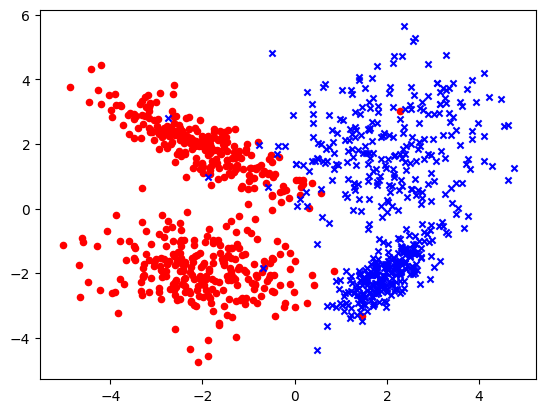

In [22]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)

model.score(X, y)

0.976

Координатная сетка

In [59]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.1),
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.1))

#матрица всех точек на графике
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

#значение функции гипотезы
Z = model.predict_proba(XX)[:,1].reshape(xx.shape)

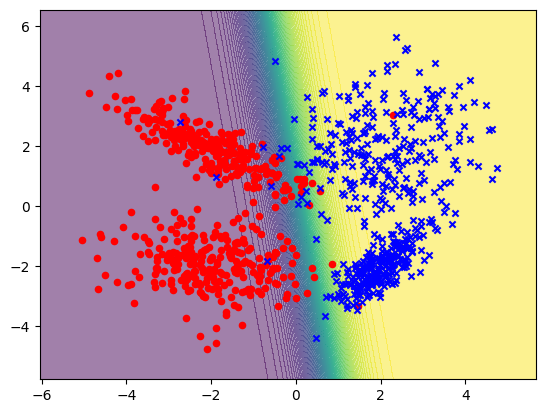

In [60]:
plt.contourf(xx, yy, Z, alpha=0.5, levels=100)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

# желтый близко к 1
# фиолетовый близко к 0

In [57]:
ZZ = model.predict(XX).reshape(xx.shape)

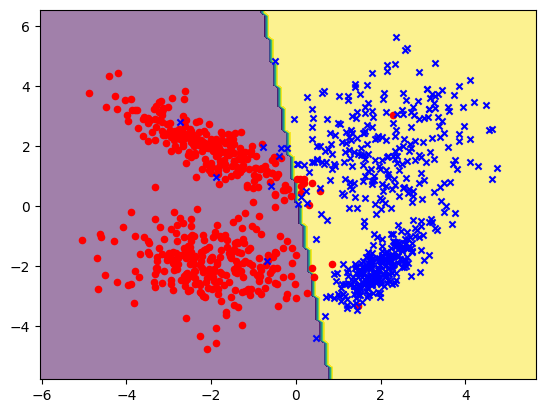

In [58]:
plt.contourf(xx, yy, ZZ, alpha=0.5, levels=100)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)

Градиентный спуск

In [86]:
class SGD():
  """
  Конструктор класс
  alpha - скорость обучения
  _n_iters - кол-во итераций гралиентного спуска
  """
  def __init__(self, alpha=0.5, n_iters=1000):
    self.b = None
    self._alpha = alpha
    self._n_iters = n_iters

  """
  Градиентный спуск
    b - вектор коэффициентов модели
    b_grad - градиент функции потерь
  """
  def gradient_step(self, b, b_grad):
          return b - self._alpha * b_grad

  """
  Запускаем градиентый спуск
    start_b - начальные веса.
  """
  def optimize(self, X, y, start_b, n_iters):
      b = start_b.copy()
      for i in range(n_iters):
          b_grad = self.grad_func(X, y, b)
          b = self.gradient_step(b, b_grad)
      return b

  """
  Обучение модели
    x - матрица признаков
    y - вектор целевых значений
  """
  def fit(self, X, y):
      m = X.shape[1]
      start_b = np.ones(m)
      self.b = self.optimize(X, y, start_b, self._n_iters)

Логистическая регрессия

In [113]:
class LogReg(SGD):
  """
  Функция вычисляет логистическую (сигмоида) функцию
    X - входные признаки
    b - веса модели
  """
  def sigmoid(self, X, b):
    z = X.dot(b)
    z = np.clip(z, -500, 500)
    return 1. / (1. + np.exp(-z))

  """
  Функция вычисляет градиент функции потерь логистической регрессии
    b — текущие веса модели
  """
  def grad_func(self, X, y, b):
      n = X.shape[0]
      grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
      return grad

  """
  Функция выдаёт вероятность принадлежности к классу 1
  """
  def predict_proba(self, X):
      return self.sigmoid(X, self.b)

  """
  Функция выдаёт бинарные предсказания (0 или 1) на основе порога 0.5
  """
  def predict(self, X):
      return self.predict_proba(X) > 0.5

In [65]:
logreg = LogReg()

X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [66]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [89]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)


print("=== Библиотечная модель LogisticRegression ===")
print(f"Accuracy: {ac:.2f}")
print(f"F1-score: {f1:.2f}")

=== Библиотечная модель LogisticRegression ===
Accuracy: 0.98
F1-score: 0.98


In [83]:
y_pred_proba = logreg.predict_proba(X)

Z = logreg.predict_proba(XX).reshape(xx.shape)

Text(0.5, 1.0, 'Библиотечная логистическая регрессия (LogisticRegression)')

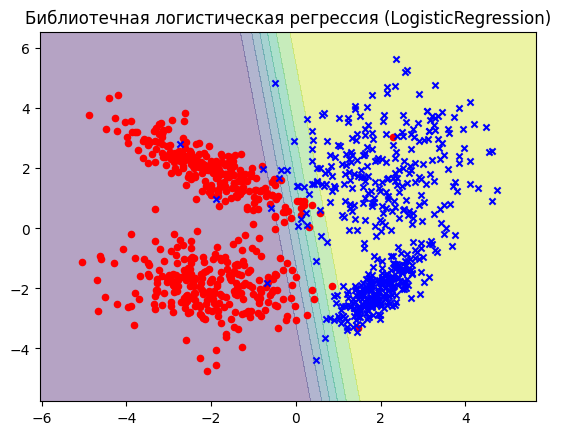

In [91]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=20)
plt.title("Библиотечная логистическая регрессия)")

In [152]:
X_1, y_1 = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    class_sep=2,
    random_state=1
)

prev_acc = None

for alpha in np.arange(0, 0.2, 0.0001):
    try:
        logreg = LogReg(alpha=alpha, n_iters=1000)
        logreg.fit(X_1, y_1)
        y_pred = logreg.predict(X_1)
        acc = accuracy_score(y_1, y_pred)

        if prev_acc is not None and acc == prev_acc:
            print(f"Точность не изменилась, остановка при alpha={alpha:.2f}")
            break

        print(f"Accuracy: {acc:.2f} при alpha={alpha:.2f}")
        prev_acc = acc
    except Exception as e:
        print(f"Расходится: {e} при alpha={alpha:.2f}")



Accuracy: 0.45 при alpha=0.00
Accuracy: 0.46 при alpha=0.00
Accuracy: 0.48 при alpha=0.00
Accuracy: 0.50 при alpha=0.00
Accuracy: 0.53 при alpha=0.00
Accuracy: 0.55 при alpha=0.00
Accuracy: 0.57 при alpha=0.00
Accuracy: 0.58 при alpha=0.00
Accuracy: 0.60 при alpha=0.00
Accuracy: 0.62 при alpha=0.00
Accuracy: 0.64 при alpha=0.00
Accuracy: 0.65 при alpha=0.00
Accuracy: 0.67 при alpha=0.00
Accuracy: 0.70 при alpha=0.00
Accuracy: 0.71 при alpha=0.00
Accuracy: 0.73 при alpha=0.00
Accuracy: 0.73 при alpha=0.00
Accuracy: 0.75 при alpha=0.00
Accuracy: 0.76 при alpha=0.00
Accuracy: 0.77 при alpha=0.00
Accuracy: 0.78 при alpha=0.00
Accuracy: 0.78 при alpha=0.00
Accuracy: 0.79 при alpha=0.00
Accuracy: 0.80 при alpha=0.00
Accuracy: 0.81 при alpha=0.00
Accuracy: 0.82 при alpha=0.00
Accuracy: 0.82 при alpha=0.00
Accuracy: 0.83 при alpha=0.00
Accuracy: 0.84 при alpha=0.00
Accuracy: 0.84 при alpha=0.00
Accuracy: 0.85 при alpha=0.00
Accuracy: 0.85 при alpha=0.00
Accuracy: 0.85 при alpha=0.00
Accuracy: 

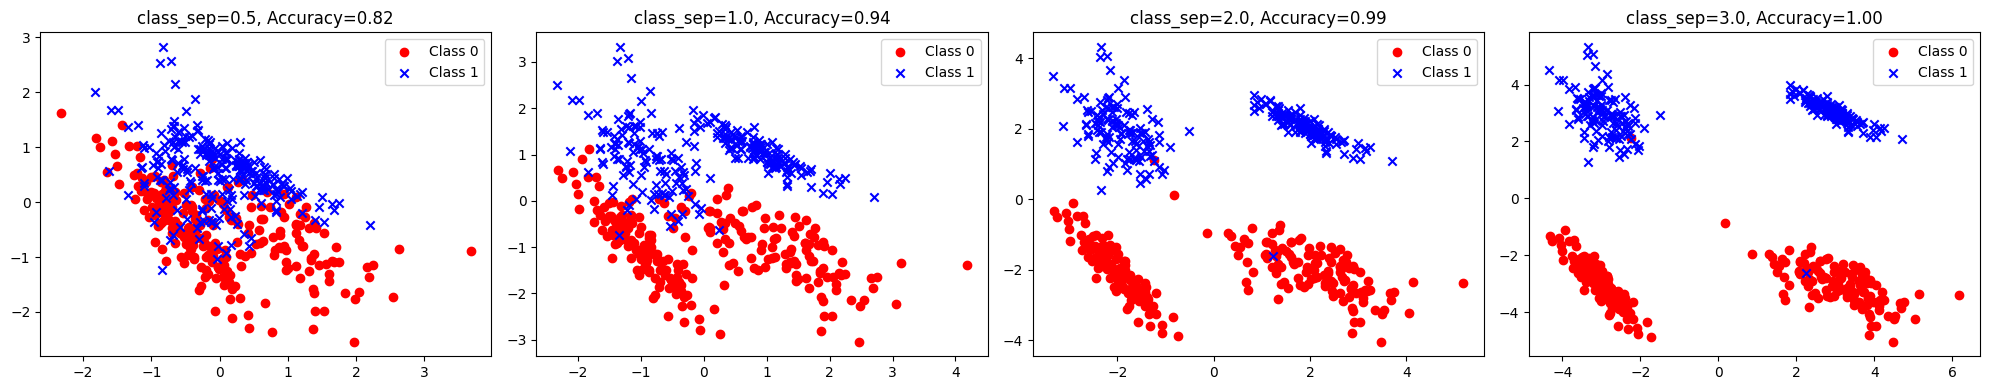

In [182]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for i, sep in enumerate([0.5, 1.0, 2.0, 3.0]):
    X_i, y_i = make_classification(
        n_samples=500,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        class_sep=sep,
        random_state=1
    )

    model = LogisticRegression()
    model.fit(X_i, y_i)
    acc = model.score(X_i, y_i)

    axes[i].scatter(X_i[:, 0][y_i==0], X_i[:, 1][y_i==0], c='red', marker='o', label='Class 0')
    axes[i].scatter(X_i[:, 0][y_i==1], X_i[:, 1][y_i==1], c='blue', marker='x', label='Class 1')
    axes[i].set_title(f'class_sep={sep}, Accuracy={acc:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [181]:
X_high, y_high = make_classification(n_samples=1000,
                                     n_features=20,
                                     n_informative=15,
                                     n_redundant=5,
                                     n_classes=2,
                                     random_state=1)

logreg_high = LogReg(alpha=0.1, n_iters=2000)
logreg_high.fit(X_high, y_high)
y_pred_hd = logreg_high.predict(X_high)

print("Accuracy (high dimensional):", accuracy_score(y_high, y_pred_hd))


Accuracy (high dimensional): 0.868


In [180]:
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X_multi, y_multi = make_classification(n_samples=1000,
                                       n_features=5,
                                       n_classes=3,
                                       n_informative=5,
                                       n_redundant=0,
                                       random_state=1)

model_ovr = OneVsRestClassifier(LogisticRegression())
model_ovr.fit(X_multi, y_multi)

y_pred_multi = model_ovr.predict(X_multi)

print("Множественная классификация (sklearn):")
print(classification_report(y_multi, y_pred_multi))


Множественная классификация (sklearn):
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       333
           1       0.69      0.66      0.67       333
           2       0.73      0.64      0.68       334

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



In [177]:
proba = model_ovr.predict_proba(X_multi)
print("Вероятности (первые 5 объектов):")
print(proba[:5])


Вероятности (первые 5 объектов):
[[0.69363615 0.06958953 0.23677432]
 [0.47421037 0.13604331 0.38974632]
 [0.27898462 0.29668497 0.42433041]
 [0.00345206 0.95769196 0.03885597]
 [0.39363649 0.19937775 0.40698576]]
